### Student Details

### Name: Brian Parle

### ID:   18200036

You may add two extra libraries: one to make a train-test split and one to perform a grid search

In [94]:
import pandas as pd

import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import math

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [95]:
plt.rcParams["figure.figsize"] = (8,5) 

#Sample code to plot SVM margin, 'gutters' and support vectors
def plot_svm_margin(X_train, y_train, clf, c, accuracy):

    plt.title('SVM with C=' + str(c) + '. Accuracy=' + str(accuracy))
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    ax.set_aspect(aspect=1)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')

In [96]:
dataset1_df = pd.read_csv("./dataset_1.csv")
dataset1_df.describe()

,Unnamed: 0,0,1,2
count,10001.000000,10001.000000,10001.000000,10001.000000
mean,5000.000000,0.082508,-0.004040,0.668233
std,2887.184355,0.615153,0.575639,0.470871
min,0.000000,-0.999635,-1.400000,0.000000
25%,2500.000000,-0.496767,-0.496319,0.000000
50%,5000.000000,0.208210,-0.006960,1.000000
75%,7500.000000,0.614940,0.491170,1.000000
max,10000.000000,0.999983,0.999918,1.000000


In [97]:
dataset1_df['2'].value_counts()

y = dataset1_df['2']
X = dataset1_df.drop(['Unnamed: 0','2'], axis=1).values

# Highly recommended for SVM to scale data in the range [0, 1]
# Input data is already in this range
# note the target attribute is already binary

#### Tasks 4 and 5, tips for the Q&A video:

Expectations:
- play with svms, kernels and hyperparameters
- use appropriate method to chose hyperparameters
- demonstrate intuition on what SVM's and kernels do
- keep it simple with a small grid of hyperparametes, 3-4 C, 2-3 kernels
- Hard margin - linearly separable, svm aims for largest margin
- Soft margin - 

### Task 4
Perform classification on dataset_1 using an SVM with linear kernel and experiment with the C-parameter to find the widest margin solution with a hard margin and a soft margin. 

##### Introduction
With SVM, the C-parameter is inversely proportional to the equivalent regularization parameter lambda for Logistoc Regression. A smaller C will lead to a softer margin, with a greater tolerance for some mis-classifications. It can prevent over-fitting but too small a C value can lead to underfitting.

In [98]:
def experiment_with_svm(model, X, y, c_range):
    #experiment with svm using parameters passed
    accuracies = []
    sv_count = []
    eout=[]
    margins=[]
    
    # prepare independent stratified data sets for training and test of the final model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, stratify=y, random_state=39)

    for c in c_range:
        clf = svm.SVC(kernel=model, C=c) #set probability=True for true randomness
        clf.fit(X_train, y_train)
        accuracy = clf.score(X_test, y_test)
        accuracies.append(accuracy)
        sv_count.append(clf.support_.shape[0])
        eout.append(np.sum(clf.n_support_) / (X_train.shape[0] - 1))
        margins.append(1 / np.sqrt(np.sum(clf.coef_ ** 2)))

    #plt c and margins
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('C (log)')
    ax1.set_ylabel('SV Count', color=color)
    ax1.plot(np.log10(c_range), sv_count, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('Margin', color=color)  # we already handled the x-label with ax1
    ax2.plot(np.log10(c_range), margins, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
    print('sv_count=', sv_count)
    print('eout=',eout)
    print('accuracies=',accuracies)
    print('margins=',margins)

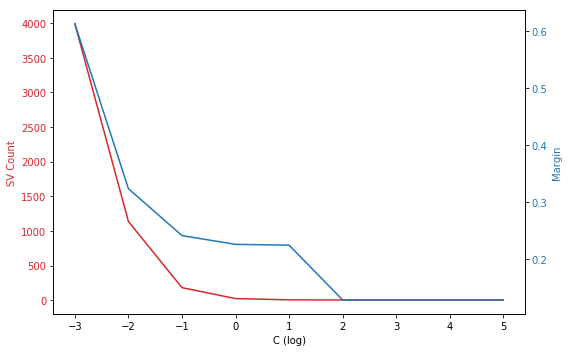

sv_count= [3992, 1136, 181, 23, 5, 3, 3, 3, 3]
eout= [0.49906238279784976, 0.14201775221902738, 0.02262782847855982, 0.002875359419927491, 0.0006250781347668458, 0.00037504688086010754, 0.00037504688086010754, 0.00037504688086010754, 0.00037504688086010754]
accuracies= [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
margins= [0.6125557547340755, 0.32299125927813527, 0.24064563322344623, 0.22522535465076193, 0.22383990487914385, 0.12760385542955366, 0.12760385542955366, 0.12760385542955366, 0.12760385542955366]


In [99]:
c_range = [0.001,0.01,0.1,1.0,10,100,1000,10000,100000]
experiment_with_svm('linear', X, y, c_range)

In the chart we see that for large C a threshold is reached at C=100. For larger C, there is no change in the margin and this is the largest hard margin we can achieve.

For lower C, values below C=0.1 yield rapidly increasing margins, and equally will have signicantly larger Eout's (given the larger number of SV's and the relationship Eout <= #ofSV's / N-1).

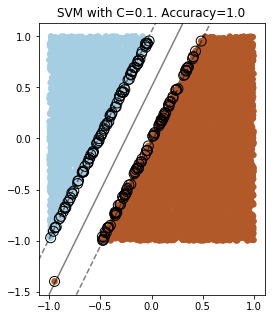

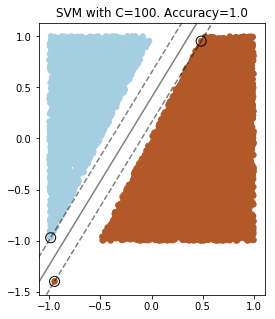

In [100]:
# prepare independent stratified data sets for training and test of the final model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, stratify=y, random_state=39)

c=0.1
clf = svm.SVC(kernel='linear', C=c) #set probability=True for true randomness
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
plot_svm_margin(X_train, y_train, clf, c, accuracy)
plt.show()
c=100
clf = svm.SVC(kernel='linear', C=c) #set probability=True for true randomness
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
plot_svm_margin(X_train, y_train, clf, c, accuracy)

The plots above show the SVM's with wide soft and hard margins respectively. The soft margin includes 181 support vectors with an Eout of 2.3%, while the hard margin only includes 3 with an Eout of 0.034% .

### Task 5
Explore the provided data sets (dataset_1, dataset_2 and dataset_3) using Support Vector Machines and choose suitable kernels and hyper-parameters.

Post to Forum:
- Your choice of kernel and hyper-parameters for each of the data sets in Task 5 and an explanation of these choices.
- A picture of an example data set containing 15 data points distributed over two classes.
- The same picture but now with the decision boundary, the two margins and (a maximum of 5) hypothetical support vectors added for an SVM with a linear kernel.

Please note you should provide these two pictures separately as the picture that only shows the data set, will be used for the response part.The data set does not need to be perfectly linearly separable, but choose your data points wisely so that you can draw a meaningful decision boundary with a maximum of 5 support vectors.

In [101]:
dataset2_df = pd.read_csv("./dataset_2.csv")
dataset2_df.describe()

,Unnamed: 0,0,1,2
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,4999.50000,0.000081,-0.000563,0.332800
std,2886.89568,0.574913,0.274366,0.471239
min,0.00000,-0.999780,-0.951513,0.000000
25%,2499.75000,-0.506704,-0.182047,0.000000
50%,4999.50000,0.001152,-0.002540,0.000000
75%,7499.25000,0.494439,0.180595,1.000000
max,9999.00000,0.999979,0.956530,1.000000


In [102]:
dataset3_df = pd.read_csv("./dataset_3.csv")
dataset3_df.describe()

,Unnamed: 0,0,1,2
count,10000.00000,10000.000000,10000.000000,10000.00000
mean,4999.50000,-0.004890,-0.002304,0.88240
std,2886.89568,0.612958,0.616565,0.32215
min,0.00000,-0.999962,-0.999991,0.00000
25%,2499.75000,-0.571095,-0.585002,1.00000
50%,4999.50000,-0.007848,-0.007517,1.00000
75%,7499.25000,0.561483,0.585625,1.00000
max,9999.00000,0.999805,0.999790,1.00000


In [103]:
y2 = dataset2_df['2']
X2 = dataset2_df.drop(['Unnamed: 0','2'], axis=1).values

y3 = dataset3_df['2']
X3 = dataset3_df.drop(['Unnamed: 0','2'], axis=1).values

In [104]:
y2.value_counts()

0.0    6672
1.0    3328
Name: 2, dtype: int64

In [105]:
y3.value_counts()

1.0    8824
0.0    1176
Name: 2, dtype: int64

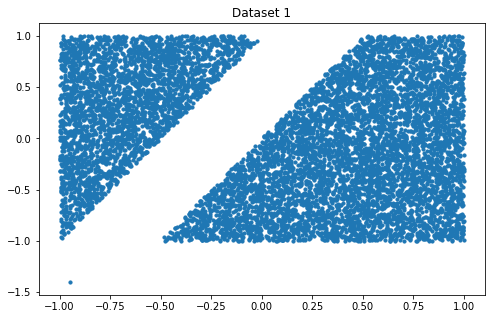

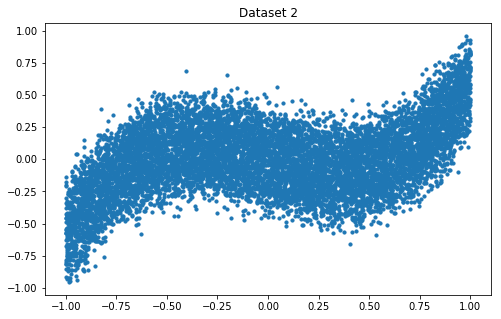

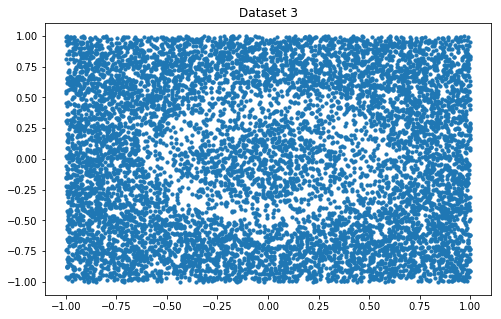

In [107]:
plt.scatter(X[:,0], X[:,1], s=10)
plt.title('Dataset 1')
plt.show()
plt.scatter(X2[:,0], X2[:,1], s=10)
plt.title('Dataset 2')
plt.show()
plt.scatter(X3[:,0], X3[:,1], s=10)
plt.title('Dataset 3')
plt.show()

In [108]:
# prepare independent stratified data sets for training and test of the final model
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, shuffle=True, stratify=y, random_state=5)

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y2, test_size=0.20, shuffle=True, stratify=y2, random_state=5)

X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X3, y3, test_size=0.20, shuffle=True, stratify=y3, random_state=5)


#### Dataset 1

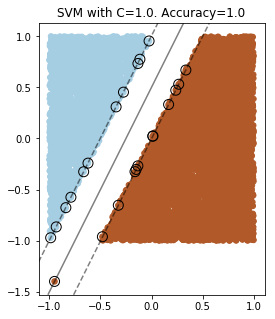

Support Vectors =  23
Expected Eout =  0.002875359419927491


In [130]:
c=1.0
gamma=0.45
clf = svm.SVC(kernel='linear', C=c) 
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
plot_svm_margin(X_train, y_train, clf, c, accuracy)
plt.show()

sv_count = clf.support_.shape[0]
eout = np.sum(clf.n_support_) / (X_train.shape[0] - 1)

print('Support Vectors = ', sv_count)
print('Expected Eout = ', eout)

Table showing summary **Eout** data for different C and kernel values (gamma=default). Accuracy always reported as 1.0 for linear and rbf. Poly gave variable accuracy figures.

| Kernel | C=0.01 | C=0.1 | C=1.0 | C=100 | C=1000 |
| --- | --- | --- | --- | --- | --- |
| linear | 0.14 | 0.02 | **0.002** | 0.0004 | 0.0004 |
| rbf | 0.18 | 0.03 | 0.005 | 0.0008 | 0.0008
| poly | 0.59 | 0.29 | 0.108 | 0.005 | 0.0007 |

The linear, rfb and poly kernels all performed well at higher values of C, where harder margins were found. Without vidsualising the dataset it is possible any of the models could be chosen with C>1, but the visualisation suggests that the linear model is a better. Further examination of precision and recall would be useful here.

#### Dataset 2

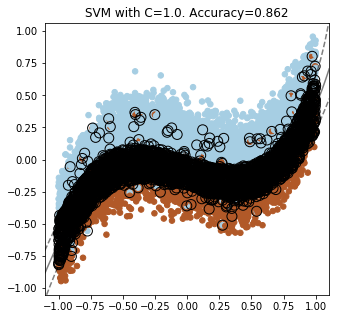

Support Vectors =  3359
Expected Eout =  0.41992749093636705


In [131]:
c=1.0
gamma=0.45
clf = svm.SVC(kernel='rbf', C=c, gamma=gamma) 
clf.fit(X_train2, y_train2)
accuracy = clf.score(X_test2, y_test2)
plot_svm_margin(X_train2, y_train2, clf, c, accuracy)
plt.show()

sv_count = clf.support_.shape[0]
eout = np.sum(clf.n_support_) / (X_train2.shape[0] - 1)

print('Support Vectors = ', sv_count)
print('Expected Eout = ', eout)


Table showing summary accuracy data for different C and kernel values (gamma=default)

| Kernel | C=0.01 | C=0.1 | C=1.0 | C=100 | C=1000 |
| --- | --- | --- | --- | --- | --- |
| linear | 0.751 | 0.7745 | 0.7775 | 0.7765 | 0.7765 |
| **rbf** | 0.7335 | 0.835 | **0.8675** | 0.865 | 0.8635
| poly | 0.667 | 0.674 | 0.7295 | 0.749 | 0.7545 |

Summary of accuracy for **rbf** kernel, C=1.0, with different gamma values.

| Gamma | Accuracy |
| --- | ---|
| 0.1 | 0.7905 |
| 0.25 | 0.8455 |
| 0.45 | **0.868** |
| 0.5 | 0.8675 |
| 0.75 | 0.8665 |

The linear and poly kernels both performed poorly compared to the rbf kernel. The rbf kernel gives the best fit, using C=1.0. A small C allows for a larger margin, which can be seen in the high number of support vectors (3354). If we use a larger C, we get very little improvement in accuracy, although we do see lower expect Eout due to the smaller number of support vectors e.g. for C=1000, accuracy=86.35% and no. SV's=2598.


#### Dataset 3

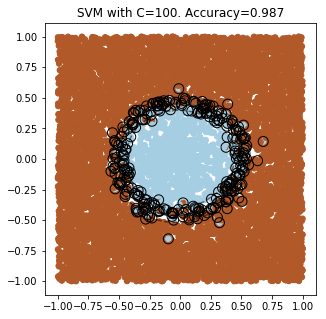

Support Vectors =  278
Expected Eout =  0.03475434429303663


In [132]:
c=100
gamma=.375
clf = svm.SVC(kernel='rbf', C=c, gamma=gamma) 
clf.fit(X_train3, y_train3)
accuracy = clf.score(X_test3, y_test3)
plot_svm_margin(X_train3, y_train3, clf, c, accuracy)
plt.show()

sv_count = clf.support_.shape[0]
eout = np.sum(clf.n_support_) / (X_train3.shape[0] - 1)

print('Support Vectors = ', sv_count)
print('Expected Eout = ', eout)


Table showing summary accuracy data for different C and kernel values (gamma=default)

| Kernel | C=0.01 | C=0.1 | C=1.0 | C=100 | C=1000 |
| --- | --- | --- | --- | --- | --- |
| linear | 0.8825 | 0.8825 | 0.8825 | 0.8825 | V. slow |
| **rbf** | 0.8825 | 0.988 | 0.9885 | **0.9895**  | 0.9895 |
| poly | 0.8825 | 0.8825 | 0.8825 | 0.8825 | 0.8825 |

Summary of accuracy for **rbf** kernel, C=100, with different gamma values.

| Gamma | Accuracy |
| --- | ---|
| 0.1 | 0.989 |
| 0.25 | 0.9895 |
| 0.375 | **0.99** |
| 1.0 | 0.989 |

Intestingly, for this dataset a higher value for C produced beter accuracy. This results in a smaller margin and a lower epxecte Eout (3.4%). Combined with a gamma of 0.375, 99% accuracy was achieved.

**As has been seen with earlier examples, the train/test dataset can influence the model performance and a cross-validation of the models would yield more reliable performance metrics.**

#### Dataset with 15 random points

In [249]:
#generate 15 data points randomly
random_indices = np.random.choice(X.shape[0], 15, replace=False)
X_random = X[random_indices]
y_random = y[random_indices]
print(random_indices)

[3850 7575  701 4911 8035  337  904 4016 4843 6741  173 2491 7842 8816
 2152]


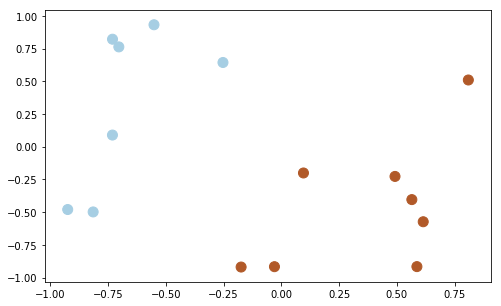

In [250]:
plt.rcParams["figure.figsize"] = (8,5) 
plt.scatter(X_random[:,0], X_random[:,1], c=y_random, s=100, cmap=plt.cm.Paired)

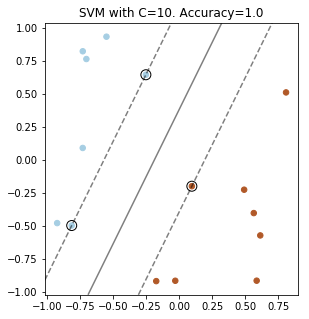

Support Vectors =  3
Expected Eout =  0.21428571428571427


In [251]:
c=10
clf = svm.SVC(kernel='linear', C=c) #set probability=True for true randomness
clf.fit(X_random, y_random)
accuracy = clf.score(X_random, y_random)
plot_svm_margin(X_random, y_random, clf, c, accuracy)
plt.show()
sv_count = clf.support_.shape[0]
eout = np.sum(clf.n_support_) / (X_random.shape[0] - 1)
print('Support Vectors = ', sv_count)
print('Expected Eout = ', eout)